In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
## import chart_studio.plotly as py
## from plotly.offline import iplot, init_notebook_mode (Don't need "init_notebook_mode")
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [2]:
df=pd.read_csv('city_day.csv')
#Converting String to Datetime
df['Date'] = pd.to_datetime(df['Date'])
print(np.dtype(df['Date']))
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
df.head()

datetime64[ns]


City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI Air_quality  
0  133.36     0.00     0.02    0.00  NaN         NaN  
1   34.06     3.68     5.50    3.77  NaN         NaN  
2   30.70     6.80    16.40    2.25  NaN         NaN  
3   36.08     4.43    10.14    1.00  NaN         NaN  
4   39.31     7.01    18.89    2.78  NaN         NaN

In [3]:
df.shape

(29531, 16)

In [4]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'Air_quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

In [6]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

# Exploratory Data Analysis

In [7]:
# How many rows available for each City.
df['City'].value_counts()

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

In [8]:
# Data availability
print(f"The available data we have is between {df['Date'].min()} and {df['Date'].max()}")

The available data we have is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


Missing value Treatment

<AxesSubplot:>

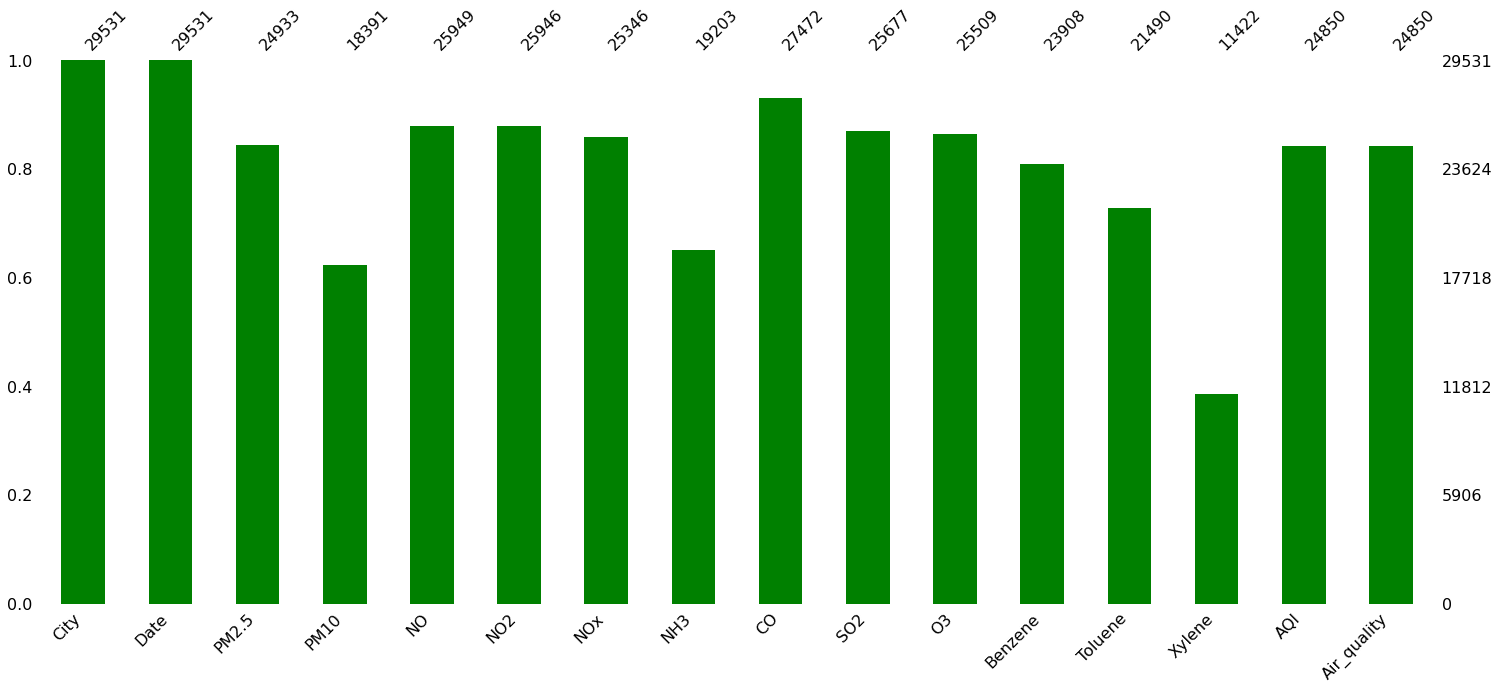

In [9]:
import missingno 
missingno.bar(df, color="green")

* In this bar chart of missing values, we can see that **Xylene, PM10** and **NH3** is mostly have the missing values.
* we can also see that we don't have any missing values in the City and Date column. 

In [13]:
df1=df.copy()
df1_columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for i in df1_columns:
    df1[i]=df1[i].fillna(df1[i].median())
df1['Air_quality']=df1['Air_quality'].fillna('moderate')

In [14]:
df1.isna().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
Air_quality    0
dtype: int64

## Pre Corona [2015 to 2020]

Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)

In [15]:
df2 = df1.copy()
df2 = df2[df2['Date']<= '2020-01-01'] 
df2['Vehicular Pollution content'] = df2['PM2.5']+df2['PM10']+df2['NO']+df2['NO2']+df2['NOx']+df2['NH3']+df2['CO']
df2['Industrial Pollution content'] = df2['SO2']+df2['O3']+df2['Benzene']+df2['Toluene']+df2['Xylene']
df2= df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          24908 non-null  object        
 1   Date                          24908 non-null  datetime64[ns]
 2   AQI                           24908 non-null  float64       
 3   Air_quality                   24908 non-null  object        
 4   Vehicular Pollution content   24908 non-null  float64       
 5   Industrial Pollution content  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ MB


In [16]:
def ploting(var):
    df2[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')


In [17]:
def max_bar_plot(var):
    df2[['City',var]].groupby(["City"]).median().sort_values(by = var,ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, linecolor='blue', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

max_bar_plot('Industrial Pollution content')
max_bar_plot('Vehicular Pollution content')

In [18]:
def min_bar_plot(var):
    df2[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='blue',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
min_bar_plot('Industrial Pollution content')
min_bar_plot('Vehicular Pollution content')

In [19]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] <= '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','Air_quality']]
    AQI[var] = AQI['Air_quality']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Pre COVID19)')

## Post Corona [2020 >]

In [20]:
df2 = df1.copy()
df2 = df2[df2['Date'] > ('2020-01-01')] 
df2['Vehicular Pollution content'] = df2['PM2.5']+df2['PM10']+df2['NO']+df2['NO2']+df2['NOx']+df2['NH3']+df2['CO']
df2['Industrial Pollution content'] = df2['SO2']+df2['O3']+df2['Benzene']+df2['Toluene']+df2['Xylene']
df2= df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4623 entries, 1827 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          4623 non-null   object        
 1   Date                          4623 non-null   datetime64[ns]
 2   AQI                           4623 non-null   float64       
 3   Air_quality                   4623 non-null   object        
 4   Vehicular Pollution content   4623 non-null   float64       
 5   Industrial Pollution content  4623 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 252.8+ KB


In [21]:
def ploting(var):
    df2[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

In [22]:
def max_bar_plot(var):
    df2[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

max_bar_plot('Industrial Pollution content')
max_bar_plot('Vehicular Pollution content')

In [23]:
def min_bar_plot(var):
    df2[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
min_bar_plot('Industrial Pollution content')
min_bar_plot('Vehicular Pollution content')


In [24]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] > '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','Air_quality']]
    AQI[var] = AQI['Air_quality']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Post COVID19)')

## Average AQI over the Years

C:\Users\SHEMI~1.DES\AppData\Local\Temp/ipykernel_14816/2911833539.py:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



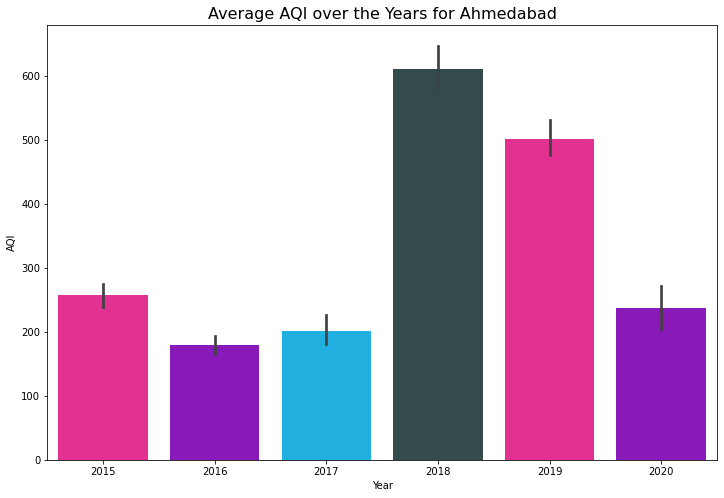

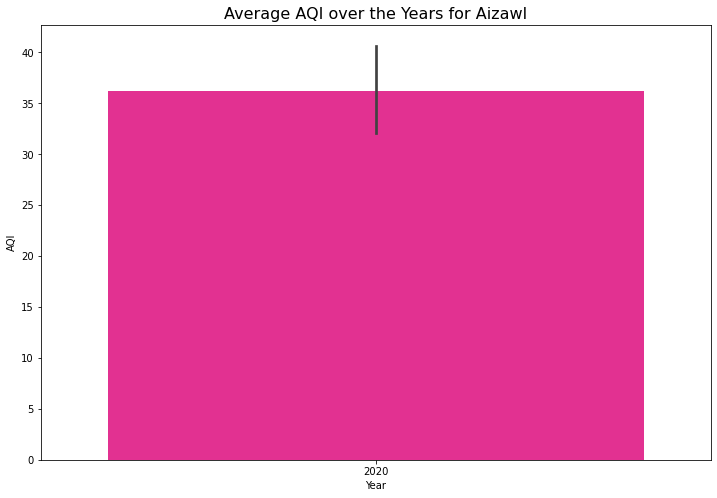

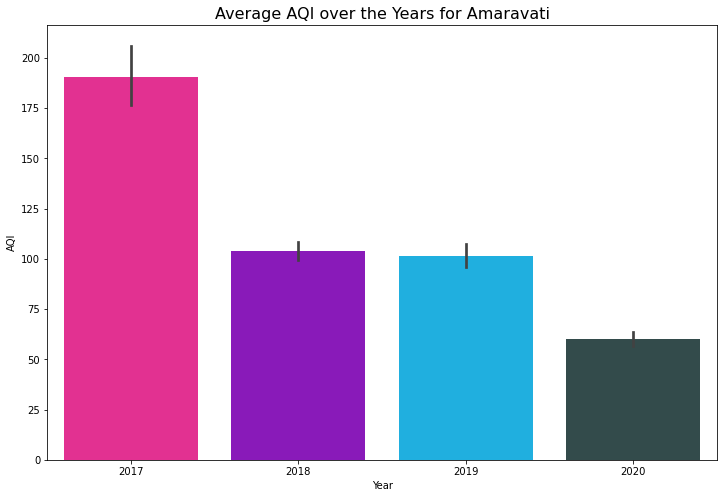

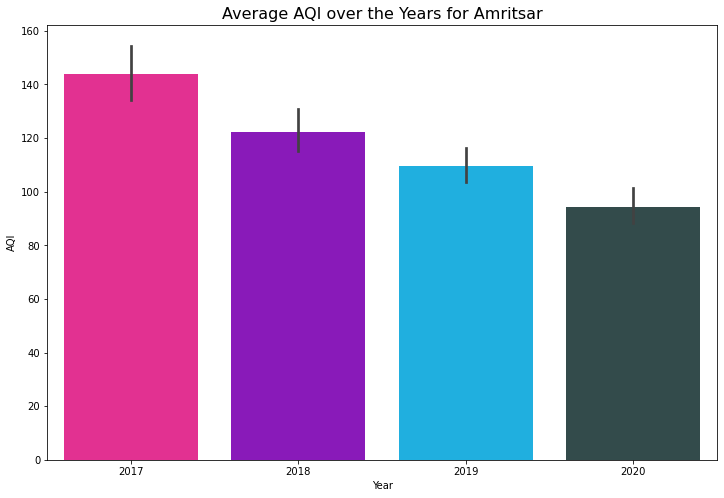

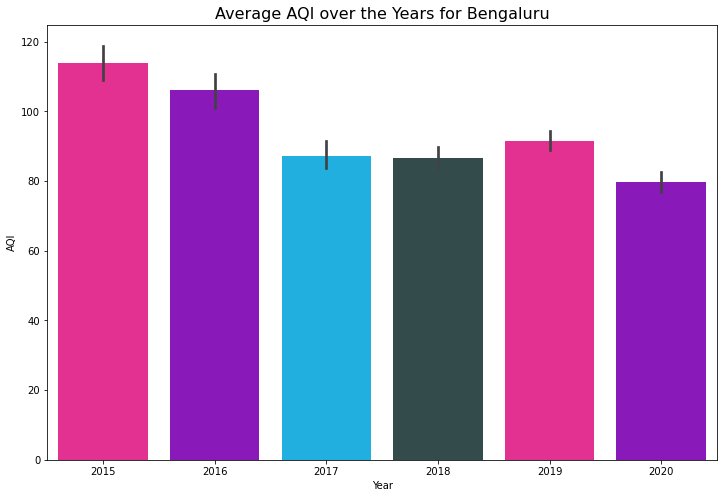

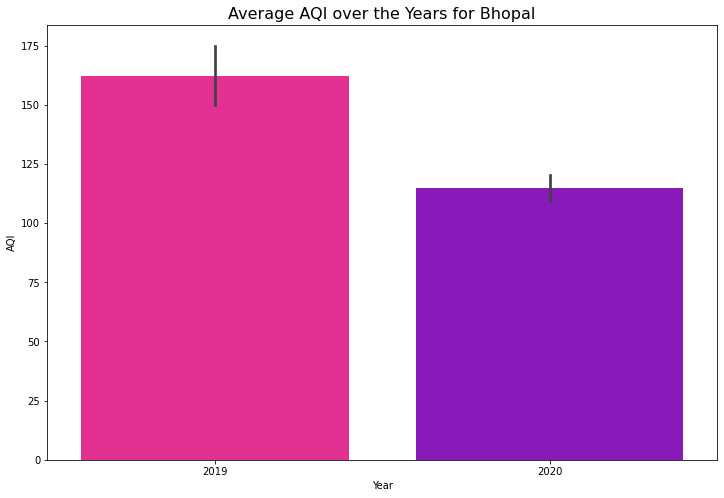

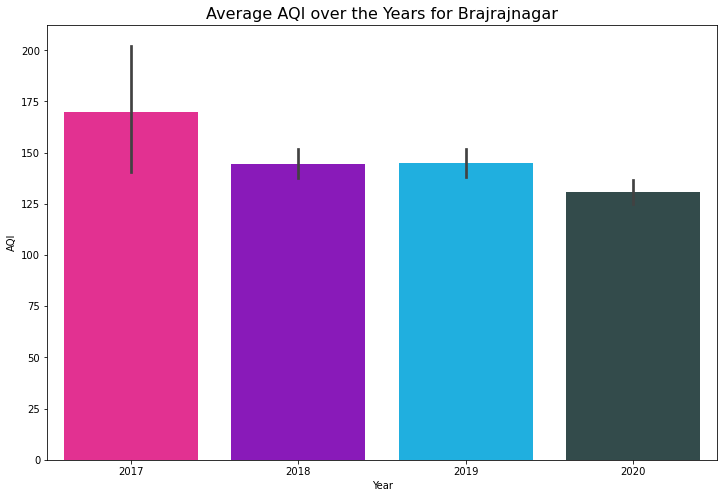

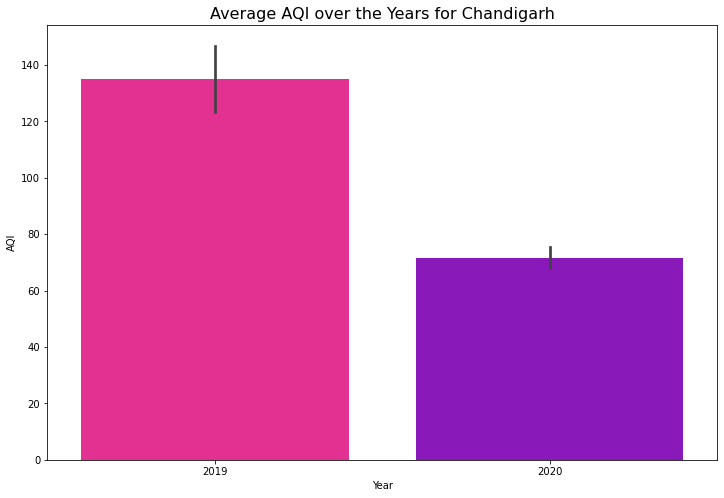

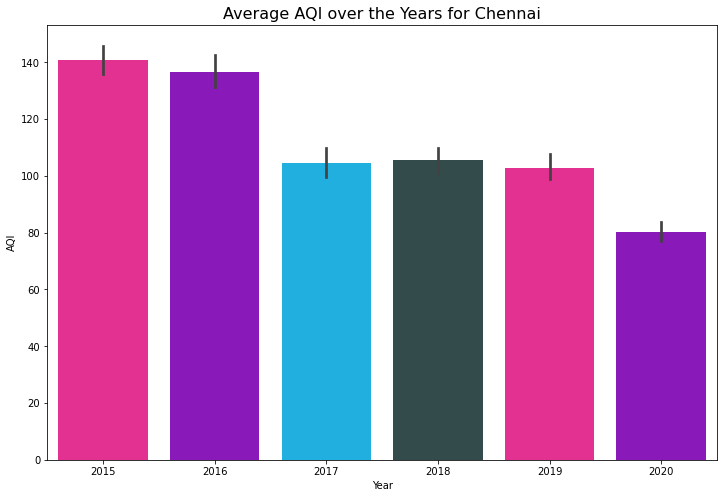

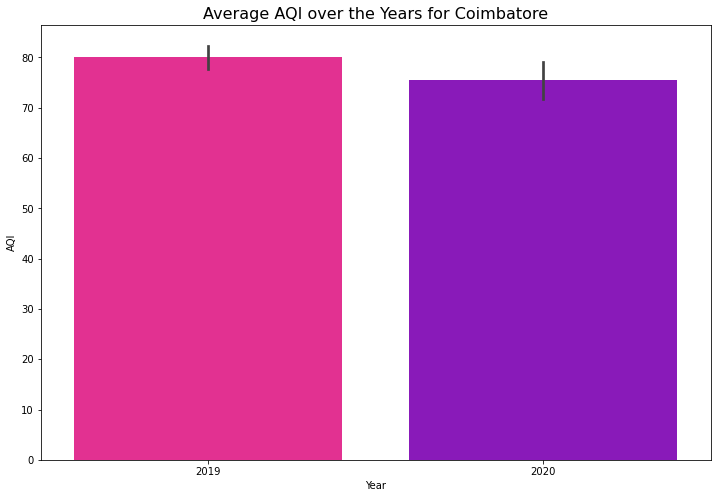

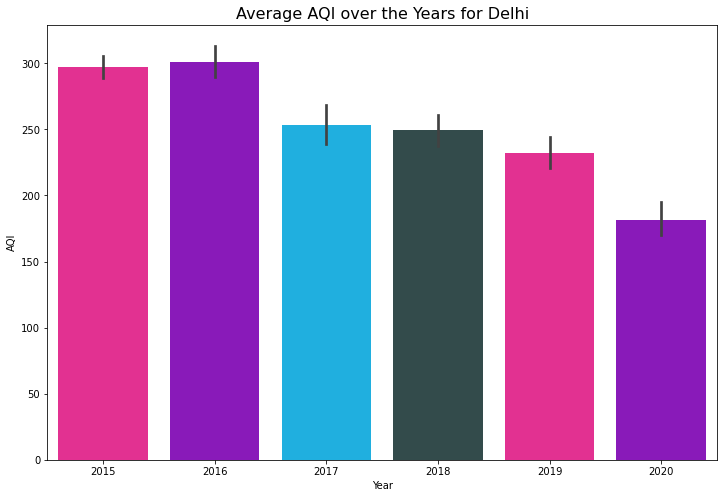

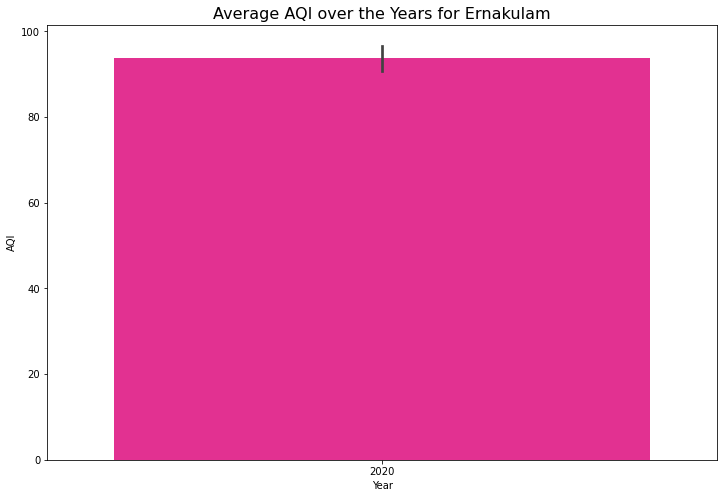

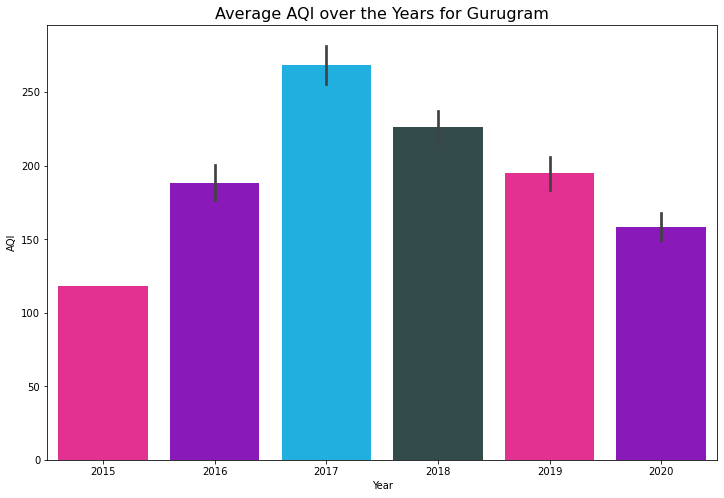

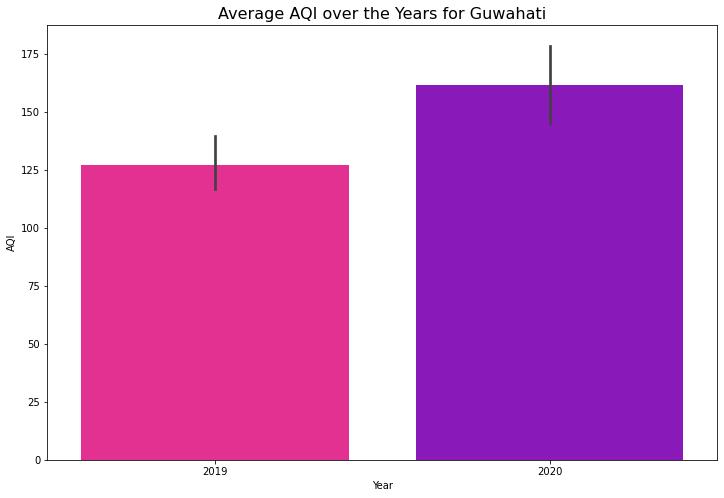

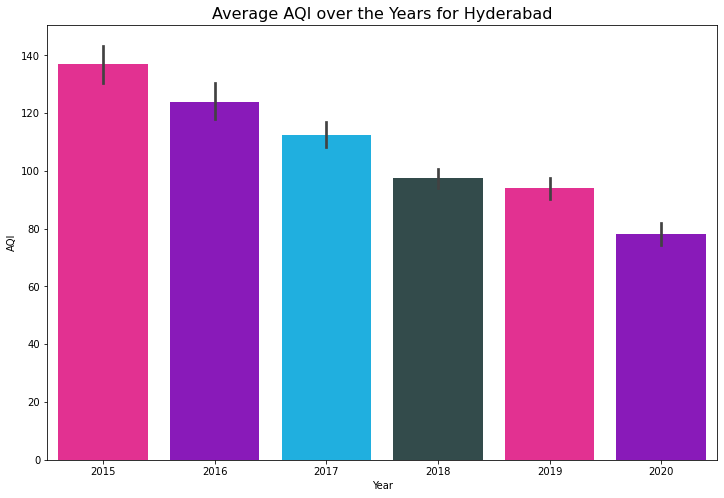

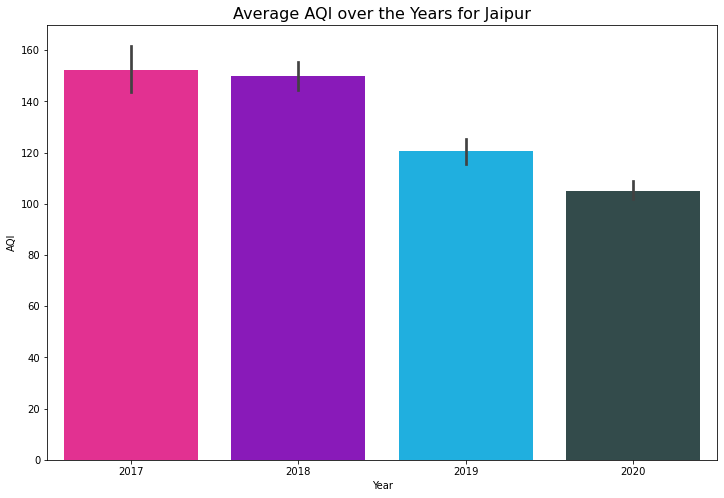

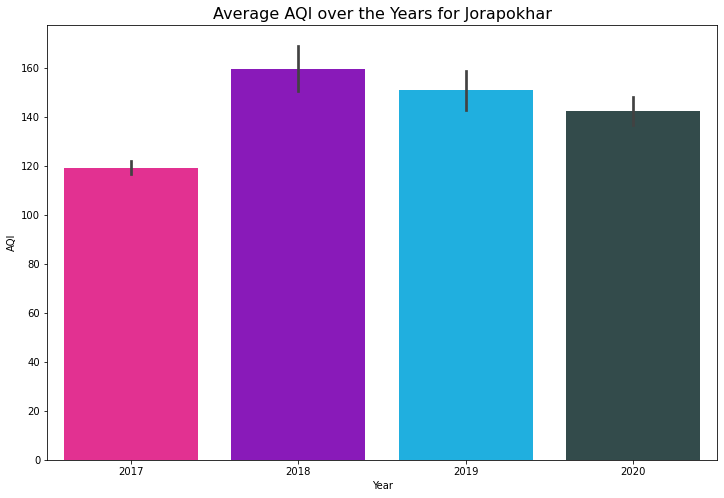

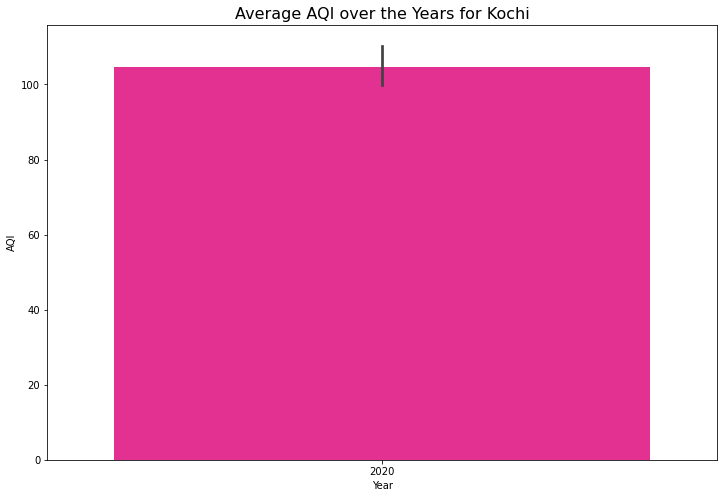

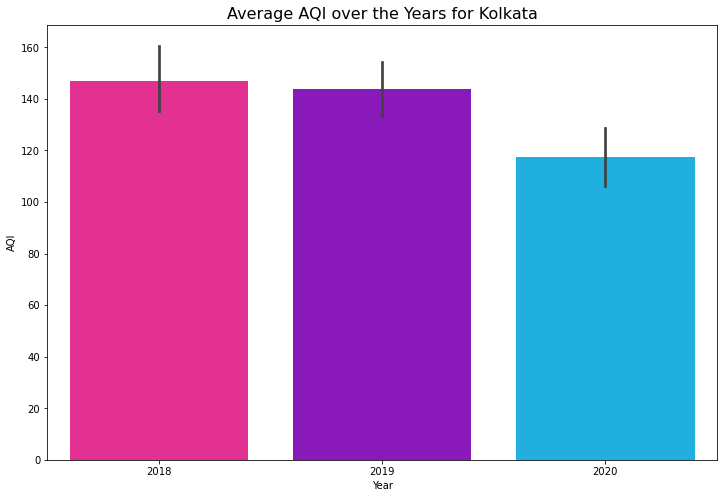

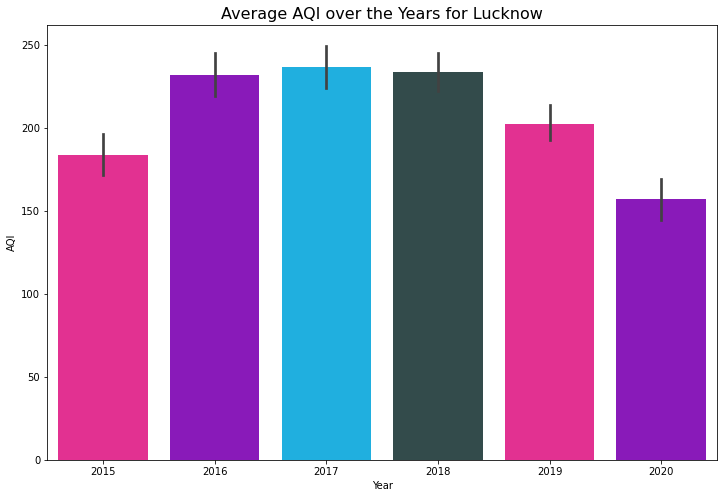

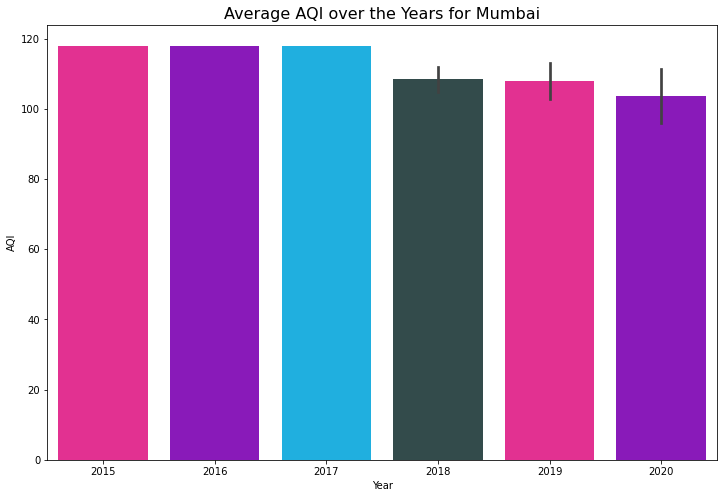

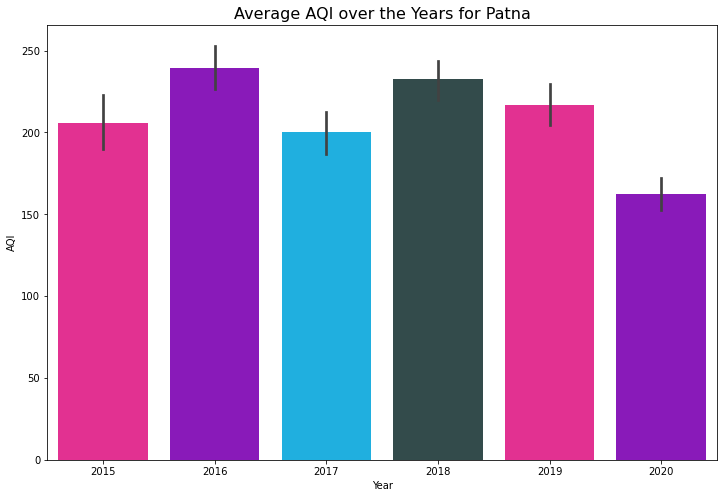

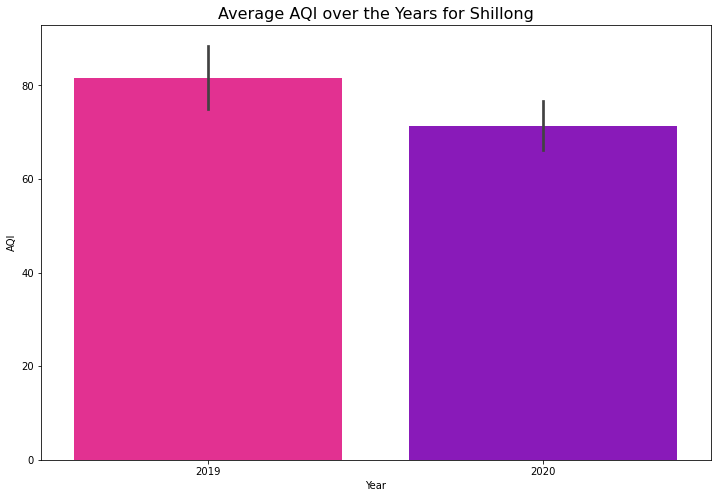

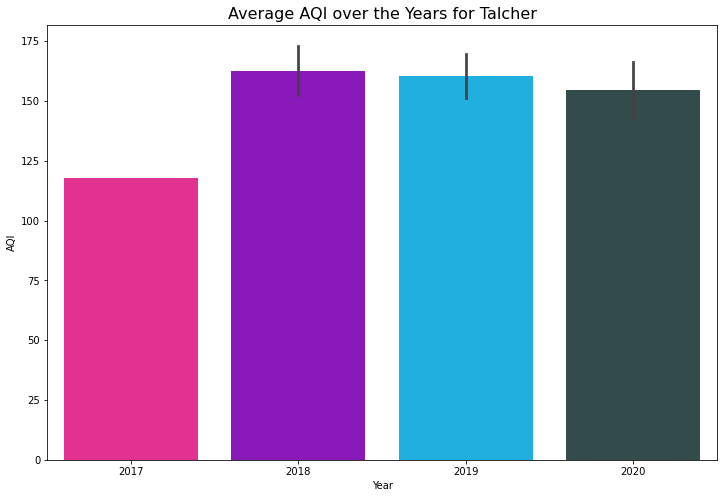

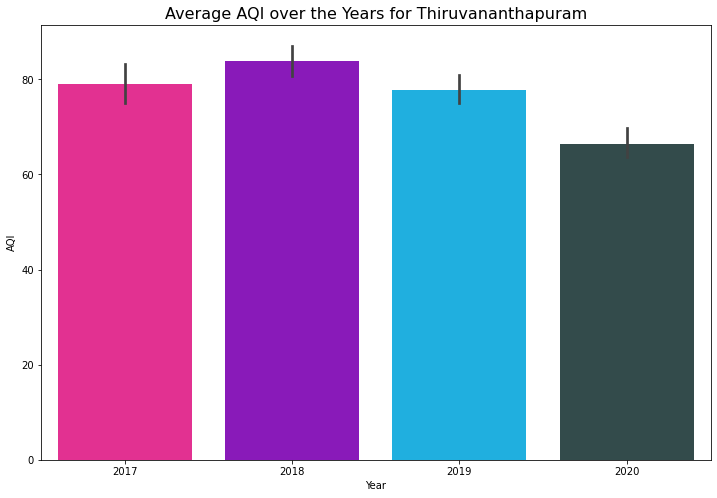

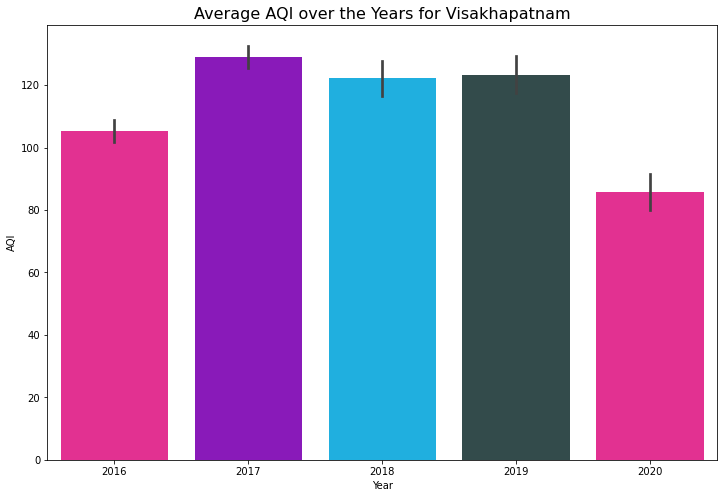

In [25]:
# Average AQI over the Years for different Cities.
color1 = 'deeppink', 'darkviolet',  'deepskyblue', 'darkslategrey'
df1['City'][df1['AQI']>=500].value_counts()
cols = df1['City'].unique()
df1['Year'] = df1.Date.dt.year.astype(int)
for col in cols:
    plt.figure(figsize=(12,8))
    x= df1[df1['City']==col]
    sns.barplot(x='Year', y='AQI', data=x, palette =color1)
    plt.title(f"Average AQI over the Years for {col}", fontsize=16)
    display()

After analyzing the Average AQI level for different cities over Years, we found that most of the cities are performing good to tackle the problem of Air Pollution. Their Average AQI level is shrinking Year by Year

## Cities with Good Air Quality.

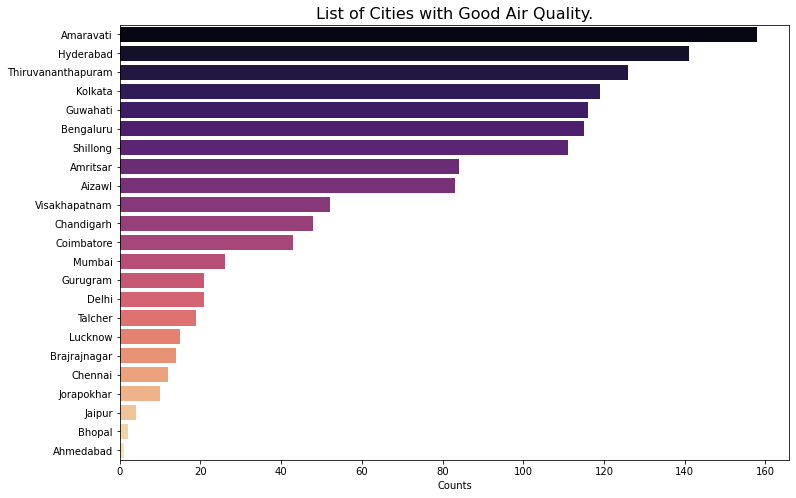

In [26]:
# Cities with Good Air
x= pd.DataFrame(df1['City'][df1['AQI']<=50].value_counts())
x= x.rename(columns={'City':'Counts'})
plt.figure(figsize=(12,8))
sns.barplot(x='Counts', y=x.index, data=x, palette= 'magma')
plt.title("List of Cities with Good Air Quality.", fontsize=16);

we observe that Shillong and Amaravati are the Top 2 City with the Good Air Quality. For more than 200 times, these two cities encounter AQI less than 50 while it is hard for other cities to get it for more than 150.

## Impact of particular matter on city air quality

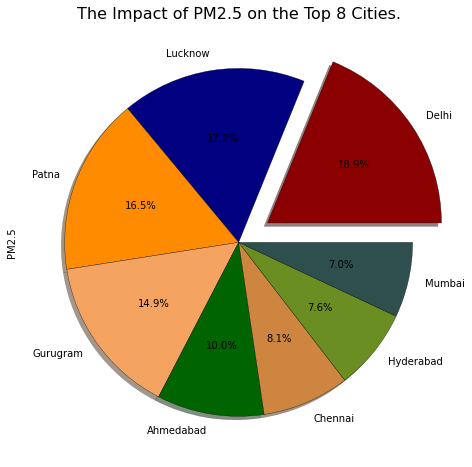

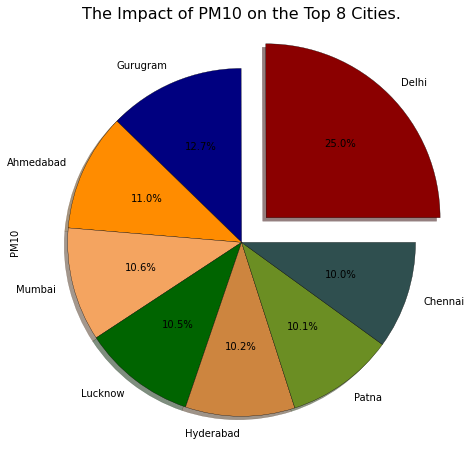

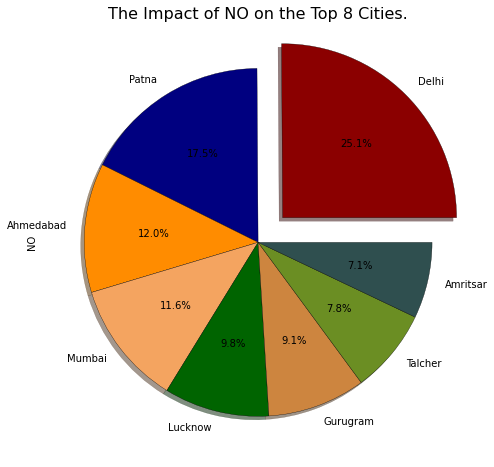

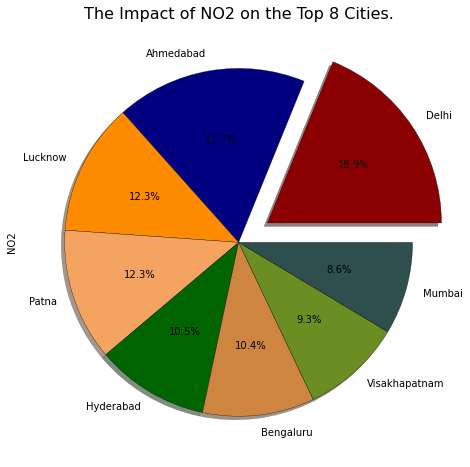

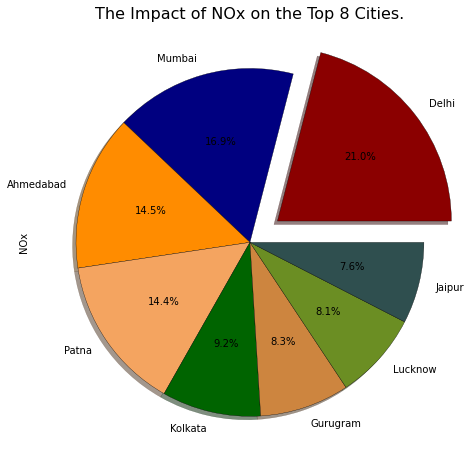

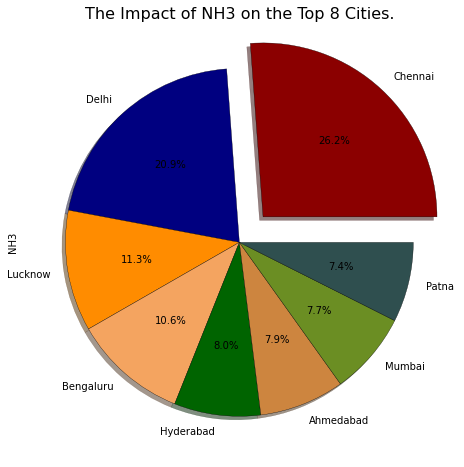

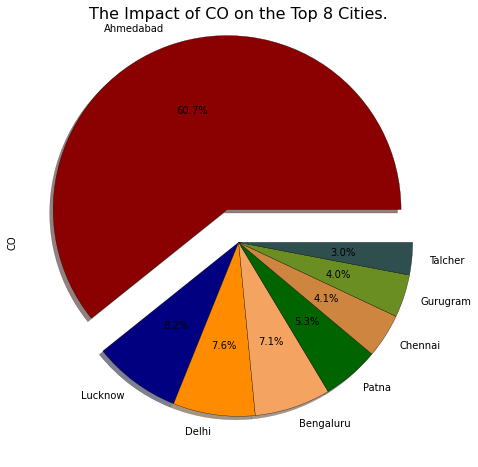

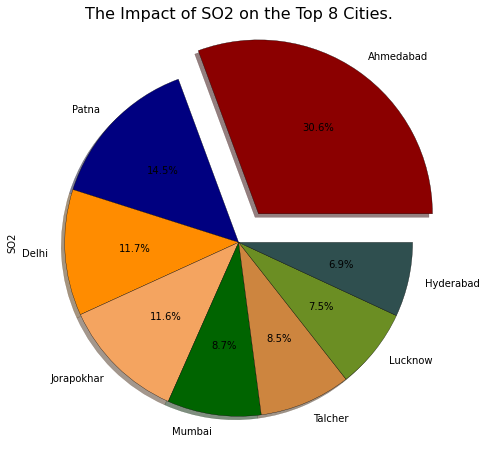

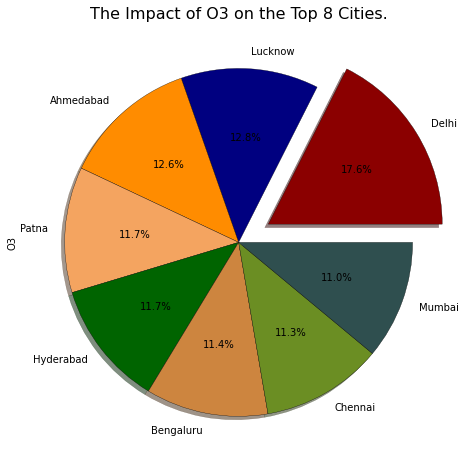

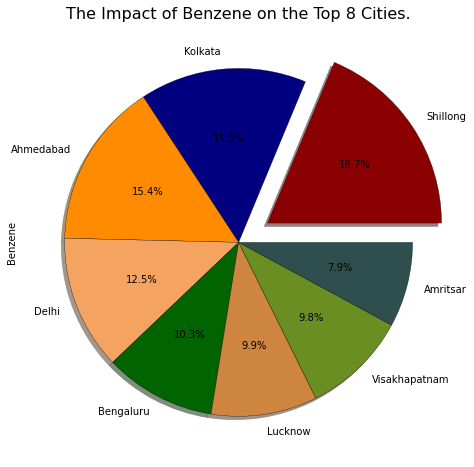

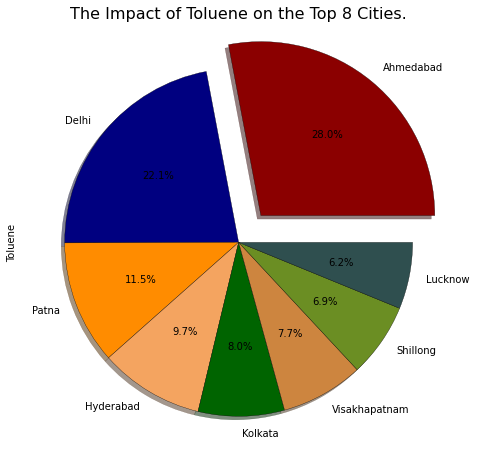

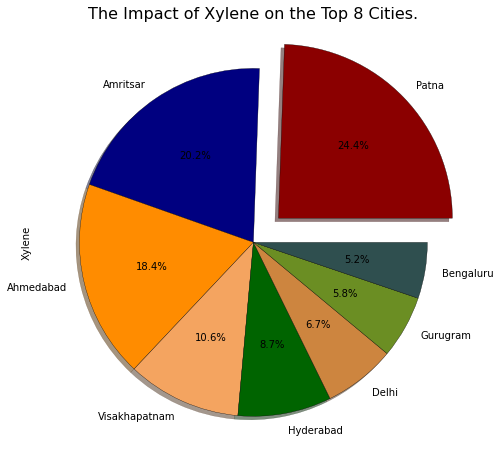

In [27]:
# Plotting Pie Plots for City Air
ex = 0.2,0,0,0,0,0,0,0
cols = 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'
color = 'darkred', 'navy', 'darkorange', 'sandybrown', 'darkgreen', 'peru', 'olivedrab', 'darkslategray'
for col in cols:
    plt.figure(figsize=(12,8))
    x= df1.groupby('City')[col].sum().sort_values(ascending=False)
    x.reset_index('City')
    x[ :8].plot.pie(shadow=True, autopct='%1.1f%%', colors=color, explode=ex, wedgeprops={'edgecolor':'black', 'linewidth':0.3})
    plt.title(f"The Impact of {col} on the Top 8 Cities.", fontsize=16)

* **After analyzing the above Pie charts, we observe that 'Ahmedabad', 'Delhi', 'Bengaluru', 'Mumbai', 'Hyderabad' and 'Chennai' are the most polluted cities of India.**
* **Ahmadabad city Air contains 82% of the total Carbon Monoxides(CO) of the Country. Carbon Monooxides is a highly poisenues gas.**
* **Mumbai City Air contains 44% of the total Sulpher dioxide(SO2) of the Country.**